<a href="https://colab.research.google.com/github/Mahsabeigi33/predict_price/blob/main/prediction_finantial_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt


In [4]:
# Dataset Generating
#df=pd.read_csv('ETH_USD.csv')
#print(df)
#data= pd.read_csv('stock_data.csv'()
data = pdr.get_data_yahoo('ETH-USD', start='2012-01-01', end='2022-12-17')
print(data)

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-11-09   308.644989   329.451996   307.056000   320.884003   320.884003   
2017-11-10   320.670990   324.717987   294.541992   299.252991   299.252991   
2017-11-11   298.585999   319.453003   298.191986   314.681000   314.681000   
2017-11-12   314.690002   319.153015   298.513000   307.907990   307.907990   
2017-11-13   307.024994   328.415009   307.024994   316.716003   316.716003   
...                 ...          ...          ...          ...          ...   
2022-12-12  1263.573486  1275.610352  1243.477783  1274.619019  1274.619019   
2022-12-13  1274.662476  1341.439331  1258.472412  1320.549194  1320.549194   
2022-12-14  1320.688599  1346.174438  1305.833374  1309.328735  1309.328735   
2022-12-15  1309.190796  1311.067139  1262.689331  1266.353882

In [5]:
df=data
df.shape

(1864, 6)

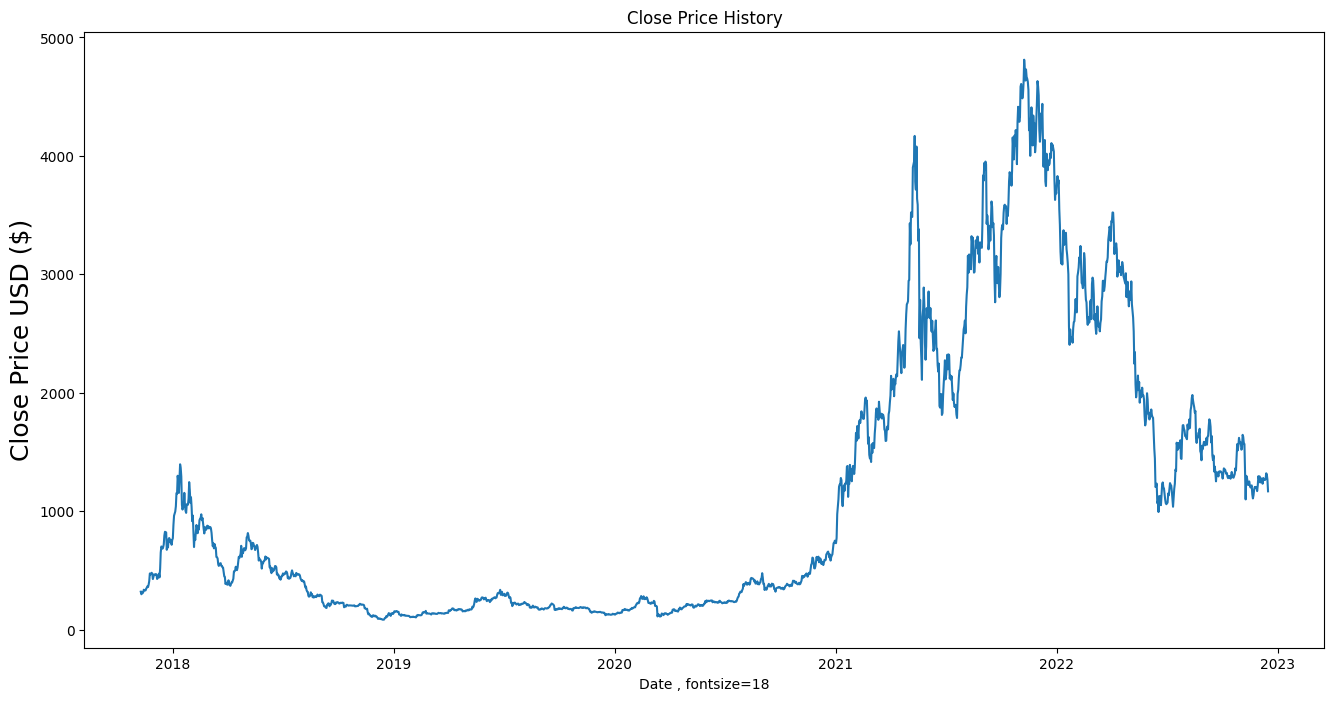

In [8]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date , fontsize=18')
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [9]:
# creat the 'Close Cloumn'
data=df.filter(['Close'])
print(data)
# convert to numpy
dataset=data.values
print(dataset.shape)
# the number of rows to be trained
training_data_len= math.ceil(len(dataset)*.8)
training_data_len

                  Close
Date                   
2017-11-09   320.884003
2017-11-10   299.252991
2017-11-11   314.681000
2017-11-12   307.907990
2017-11-13   316.716003
...                 ...
2022-12-12  1274.619019
2022-12-13  1320.549194
2022-12-14  1309.328735
2022-12-15  1266.353882
2022-12-16  1168.259399

[1864 rows x 1 columns]
(1864, 1)


1492

In [10]:
# scale the data
scalar=MinMaxScaler(feature_range=(0,1))
scaled_data=scalar.fit_transform(dataset)

print(scaled_data.shape)

(1864, 1)


In [11]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
#img_1=cv2.imread('Project_1.PNG')
#cv2_imshow(img_1)

# ready data & create LSTM algorithm

In [12]:
# creat scaled data for training

train_data=scaled_data[0:training_data_len,:]

# split data to x_train , x_test
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  


In [13]:
#convert  the x_train , y_train to numpy arrays

x_train,y_train=np.array(x_train),np.array(y_train)

In [14]:
#Reshape the data

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

x_train.shape



(1432, 60, 1)

In [15]:
#Build the LSTM model

model=Sequential()
model.add(LSTM(50, return_sequences=True , input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [16]:
# Compile the Model 
model.compile(optimizer='adam',loss='mean_squared_error')


In [17]:
# Train the Model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1432/1432 [==============================] - 50s 33ms/step - loss: 0.0022


In [ ]:
#img_2=cv2.imread('Project_2.PNG')
#cv2_imshow(img_2)

## ***validation data 3***

In [18]:
# Creating the testing dataset

test_data=scaled_data[training_data_len-60:,:]
print(len(test_data))
x_test=[] 
y_test=dataset[training_data_len:,:]
print(len(test_data))
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  


432
432


In [19]:
#convert x_test to numpy arrays
x_test=np.array(x_test)


In [20]:
# Reshape x_test

x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [21]:
# Prediction
predictions=model.predict(x_test)
predictions=scalar.inverse_transform(predictions)


12/12 [==============================] - 1s 18ms/step


In [22]:
# The root mean squared error
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

105.41251873713668

<ipython-input-24-d12559d3252a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


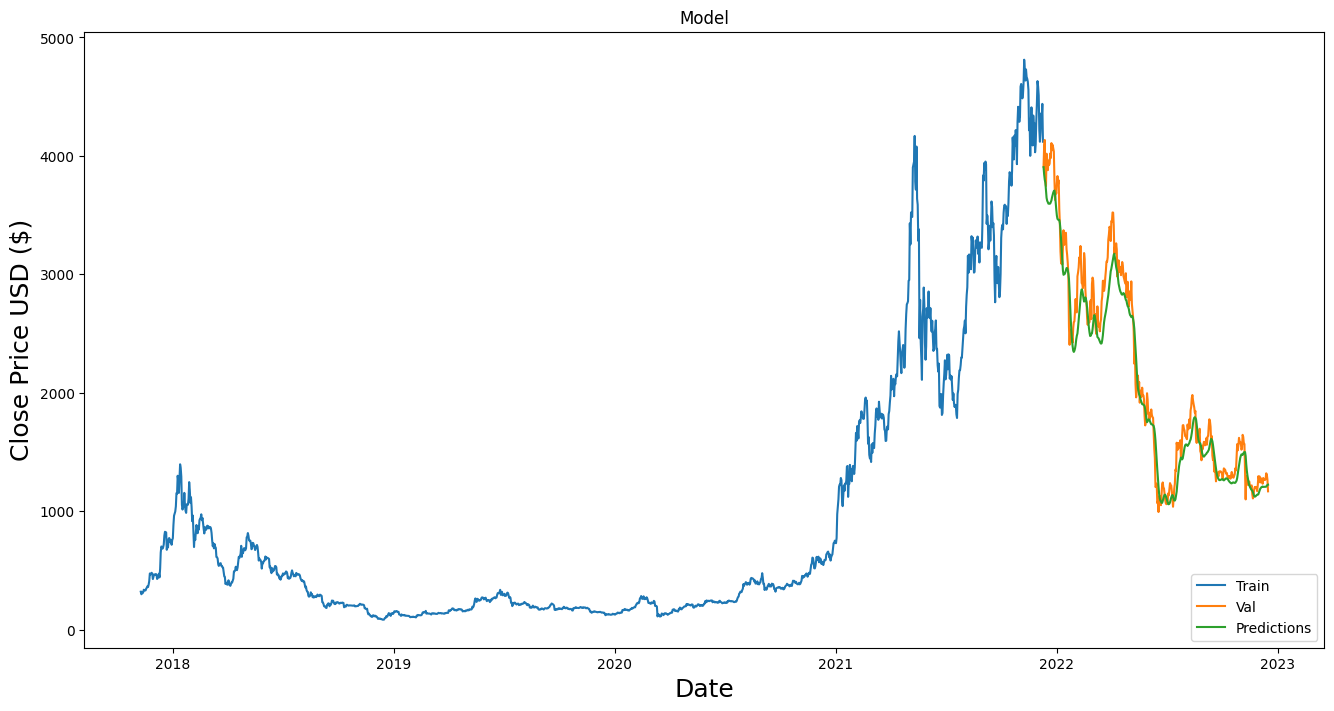

In [24]:
#Plot the data

train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)' , fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()





In [25]:
# Show the valid and predicted prices
valid


,Close,Predictions
Date,,
2021-12-10,3908.496094,3904.939453
2021-12-11,4084.452393,3842.954834
2021-12-12,4134.453125,3798.737549
2021-12-13,3784.226807,3774.656982
2021-12-14,3745.440430,3714.853760
...,...,...
2022-12-12,1274.619019,1206.589478
2022-12-13,1320.549194,1207.760986
2022-12-14,1309.328735,1215.135742


In [26]:
aapl = pdr.get_data_yahoo('ETH-USD', start='2012-01-01', end='2022-12-17')

# Create a new data frame
new_df=aapl.filter(['Close'])


# Get the last 60 day Closing price values and convert the dataframe to an array

last_60_days=new_df[-60:].values


# Scale the data to be values between 0 and 1

last_60_days_scaled=scalar.transform(last_60_days)
  
# Create an empty list

X_test=[]

X_test.append(last_60_days_scaled)

# Convert the numpy array

X_test=np.array(X_test)

# Reshape the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pred_price=model.predict(X_test)

# Get the predicted scalar price
pred_price=scalar.inverse_transform(pred_price)
print(pred_price)



[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 46ms/step
[[1210.6556]]


In [28]:
aapl_2= pdr.get_data_yahoo('ETH-USD', start='2019-12-17', end='2022-12-20')
print(aapl_2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2019-12-17     122.603889
2019-12-18     133.092194
2019-12-19     129.321136
2019-12-20     129.066055
2019-12-21     128.130951
                 ...     
2022-12-15    1266.353882
2022-12-16    1168.259399
2022-12-17    1188.149536
2022-12-18    1184.715210
2022-12-19    1167.609863
Name: Close, Length: 1099, dtype: float64
